# 직원 이탈 예측

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
url = 'https://raw.githubusercontent.com/Heez27/AICE_Associate/main/csv/employee_churn.csv'
churn_df = pd.read_csv(url)
churn_df.head()

,years_experience,salary,education_level,department,overtime,job_satisfaction,work_life_balance,attrition
0,15.0,54.6,master,finance,N,3,4,1
1,5.6,116.6,bachelor,hr,N,3,2,1
2,11.0,32.2,phd,hr,N,4,2,1
3,16.2,82.2,phd,sales,Y,1,3,1
4,12.4,97.7,high_school,engineering,N,2,3,1


<Axes: xlabel='department', ylabel='work_life_balance'>

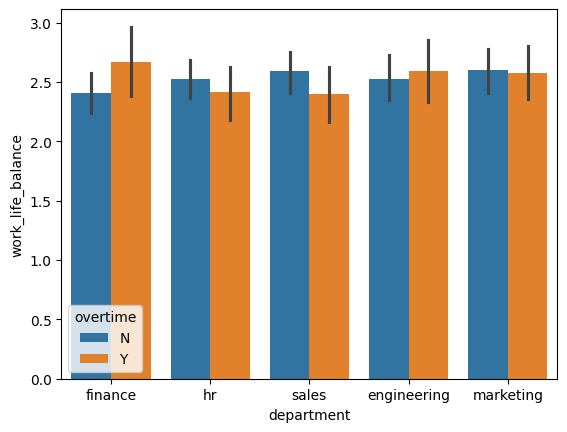

In [3]:
sns.barplot(churn_df, x="department", y="work_life_balance", hue="overtime")

# 문제4. 결측치가 있는 컬럼을 찾고, 결측치가 존재하는 행 제거

In [4]:
churn_df.isnull().sum()

,0
years_experience,44
salary,44
education_level,0
department,0
overtime,0
job_satisfaction,0
work_life_balance,0
attrition,0


In [5]:
pre_df = 'years_experience, salary'

In [6]:
pre_df = churn_df.drop(columns=['years_experience', 'salary'], axis=1)
pre_df.reset_index(drop=True, inplace=True)
pre_df.head()

,education_level,department,overtime,job_satisfaction,work_life_balance,attrition
0,master,finance,N,3,4,1
1,bachelor,hr,N,3,2,1
2,phd,hr,N,4,2,1
3,phd,sales,Y,1,3,1
4,high_school,engineering,N,2,3,1


# 문제5. department별로 job_satisfaction 평균 분석

In [7]:
pre_df.groupby('department')['job_satisfaction'].mean()

,job_satisfaction
department,
engineering,2.473934
finance,2.545872
hr,2.545455
marketing,2.579439
sales,2.506977


#

# 문제6. 부서별로 이직률(attrition)분석

In [8]:
pd.crosstab(pre_df['department'], pre_df['attrition'], normalize = 'index').round(2)

attrition,0,1
department,,
engineering,0.62,0.38
finance,0.67,0.33
hr,0.65,0.35
marketing,0.67,0.33
sales,0.73,0.27


# 문제7. 인코딩

In [9]:
edu_map = {
    'high_school':0,
    'bachelor':1,
    'master':2,
    'phd':3
}
pre_df['education_level'] = pre_df['education_level'].map(edu_map)

In [10]:
encoding_df = pd.get_dummies(pre_df,columns=['department'], drop_first=True)
encoding_df['overtime'] = np.where(encoding_df['overtime'] =='Y', 1, 0)
encoding_df.head()

,education_level,overtime,job_satisfaction,work_life_balance,attrition,department_finance,department_hr,department_marketing,department_sales
0,2,0,3,4,1,True,False,False,False
1,1,0,3,2,1,False,True,False,False
2,3,0,4,2,1,False,True,False,False
3,3,1,1,3,1,False,False,False,True
4,0,0,2,3,1,False,False,False,False


# 문제8. X와 y 구분

In [11]:
X = encoding_df.drop('attrition', axis=1)
y = encoding_df['attrition']

# 문제9. train_test_split

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# 문제10. StandardScaler

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_valid)

# 문제11. LightGBM

In [15]:
from lightgbm import LGBMClassifier

In [16]:
lgbmc = LGBMClassifier(n_estimators=100, max_depth=6, learning_rate = 0.01, random_state=10)
lgbmc.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 286, number of negative: 594
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000307 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 30
[LightGBM] [Info] Number of data points in the train set: 880, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.325000 -> initscore=-0.730888
[LightGBM] [Info] Start training from score -0.730888
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

LGBMClassifier(learning_rate=0.01, max_depth=6, random_state=10)

# 문제12. XGBoost 모델

In [17]:
from xgboost import XGBClassifier

In [18]:
xgbc = XGBClassifier(n_estimators=200, max_depth=8, learning_rate = 0.1, random_state=10)
xgbc.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=8,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, ...)

# 문제13. 모델 예측 결과 비교

In [19]:
from sklearn.metrics import accuracy_score, f1_score

In [21]:
lgbmc_predict = lgbmc.predict(X_test)
xgbc_predict = xgbc.predict(X_test)
print('lightGBM:')
print('accuracy:', accuracy_score(y_valid, lgbmc_predict))
print('f1 score:', f1_score(y_valid, lgbmc_predict))
print('XGBoost:')
print('accuracy:', accuracy_score(y_valid, xgbc_predict))
print('f1 score:', f1_score(y_valid, xgbc_predict))

lightGBM:
accuracy: 0.6409090909090909
f1 score: 0.0
XGBoost:
accuracy: 0.5
f1 score: 0.22535211267605634


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


# 문제 14. 딥러닝

In [23]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization
from tensorflow.keras.utils import to_categorical
tf.random.set_seed(10)

y_train = to_categorical(y_train, num_classes=2)
y_valid = to_categorical(y_valid, num_classes=2)

In [27]:
model = Sequential()
model.add(Dense(64, activation="selu", input_shape=(X_train.shape[1],)))
model.add(BatchNormalization())
model.add(Dense(32, activation="selu"))
model.add(BatchNormalization())
model.add(Dense(16, activation="selu"))
model.add(Dense(2, activation="softmax"))
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
model.fit(X_train,y_train,batch_size=32, epochs=50)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5590 - loss: 0.8602
Epoch 2/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6415 - loss: 0.6473 
Epoch 3/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6701 - loss: 0.6317 
Epoch 4/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6797 - loss: 0.6190 
Epoch 5/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6755 - loss: 0.6118 
Epoch 6/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6815 - loss: 0.6067 
Epoch 7/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6865 - loss: 0.6015 
Epoch 8/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6854 - loss: 0.5972
Epoch 9/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6809 - loss: 0.5934 
Epoch 10/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6814 - loss: 0.5901 
Epoch 11/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6800 - loss: 0.5870
Epoch 12/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6